### Bike Details (EDA - 1)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Bike details.csv')

In [3]:
df.shape

(1061, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [5]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


Q1) What is the range of selling prices in the dataset ?

In [6]:
min_price = df['selling_price'].min()
max_price = df['selling_price'].max()
price_range = max_price - min_price
print(f"The range of selling prices is {price_range}.")

The range of selling prices is 755000.


Q2) What is the median selling price for bikes in the dataset ?

In [7]:
df['selling_price'].median()

45000.0

Q3) What is the most common seller type ?

In [8]:
df['seller_type'].mode()

0    Individual
Name: seller_type, dtype: object

Q4) How many bikes have driven more than 50,000 kilometers ?

In [9]:
km_driven_count = len(df[df['km_driven'] > 50000])
km_driven_count

170

Q5) What is the average km_driven value for each ownership type ?

In [10]:
ownership_km_driven = df.groupby('owner')['km_driven'].mean()
ownership_km_driven

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64

Q6) What proportion of bikes are from the year 2015 or older ?

In [11]:
len(df[df['year'] <= 2015]) / len(df)

0.5664467483506126

Q7) What is the trend of missing values across the dataset ?

In [12]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_percentage

name                  0.000000
selling_price         0.000000
year                  0.000000
seller_type           0.000000
owner                 0.000000
km_driven             0.000000
ex_showroom_price    40.999057
dtype: float64

Q8)  What is the highest ex_showroom_price recorded, and for which bike ?

In [13]:
highest_ex_showroom_price = df['ex_showroom_price'].max()
bike_with_highest_price = df.loc[df['ex_showroom_price'] == highest_ex_showroom_price, 'name'].iloc[0]

print(f"The highest ex_showroom_price is {highest_ex_showroom_price} for the bike {bike_with_highest_price}")

The highest ex_showroom_price is 1278000.0 for the bike Harley-Davidson Street Bob


Q9) What is the total number of bikes listed by each seller type ?

In [14]:
df.groupby('seller_type')['name'].count()

seller_type
Dealer           6
Individual    1055
Name: name, dtype: int64

Q10)  What is the relationship between selling_price and km_driven for first-owner bikes ?

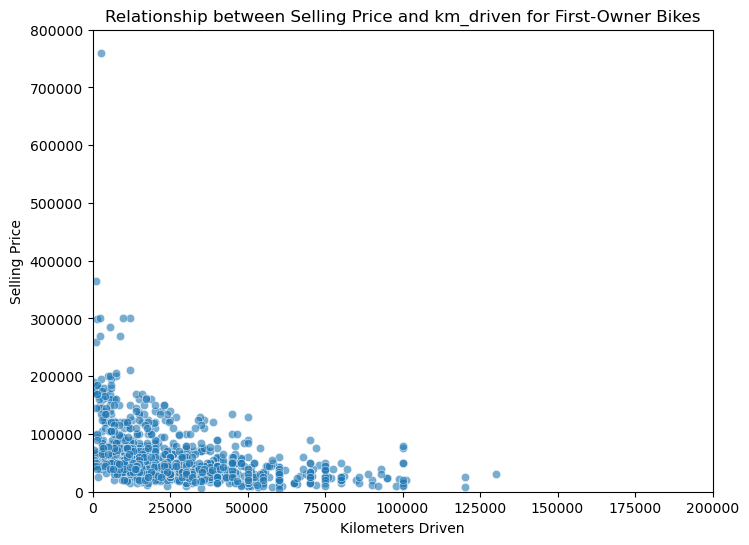

In [15]:
first_owner_bikes = df[df['owner'] == '1st owner']

plt.figure(figsize=(8, 6))
sns.scatterplot(x='km_driven', y='selling_price', data = first_owner_bikes, alpha=0.6)

plt.title('Relationship between Selling Price and km_driven for First-Owner Bikes')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')

plt.xlim(0, 200000)
plt.ylim(0, 800000)

plt.show()

Insights > The Kilometer of the bike is increases, the price of the bike decreases

Q11)  Identify and remove outliers in the km_driven column using the IQR method.

In [16]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1054,Hero CBZ Xtreme,20000,2010,Individual,1st owner,50000,78700.0
1055,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0


Q12)  Perform a bivariate analysis to visualize the relationship between year and selling_price.

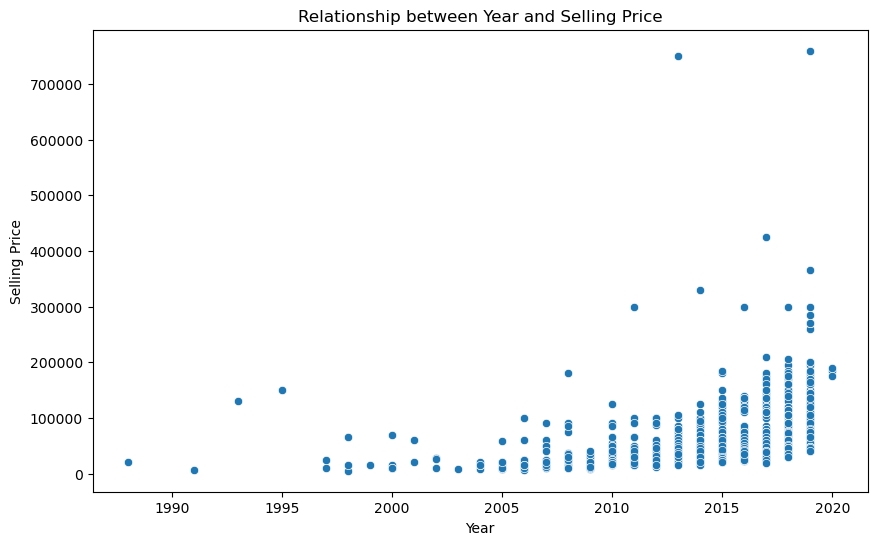

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data = df)
plt.title('Relationship between Year and Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

Insights >  year between 2015 - 2020 Bike prices are increased.

Q13)  What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year) ?

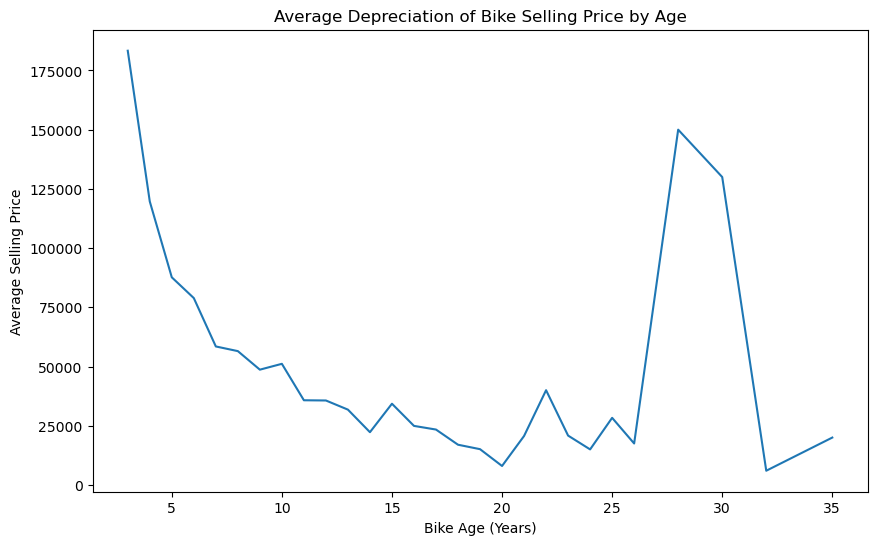

In [18]:
# Calculate the age of each bike
current_year = 2023
df['bike_age'] = current_year - df['year']

# Calculate the average depreciation for each bike age
depreciation_by_age = df.groupby('bike_age')['selling_price'].mean()

plt.figure(figsize=(10, 6))
plt.plot(depreciation_by_age.index, depreciation_by_age.values)
plt.xlabel("Bike Age (Years)")
plt.ylabel("Average Selling Price")
plt.title("Average Depreciation of Bike Selling Price by Age")
plt.show()

Insights > The selling price drops significantly in the first few years, indicating that bikes lose a large portion of their value early on. There are unexpected spikes around 25-30 years, which could indicate rare or classic bikes holding or even increasing in value.

Q14) Which bike names are priced significantly above the average price for their manufacturing year ?

In [19]:
# Calculate the average selling price for each year
average_price_by_year = df.groupby('year')['selling_price'].mean()

# Merge the average price back into the original DataFrame
df['average_price_for_year'] = df['year'].map(average_price_by_year)

# Identify bikes priced significantly above average for their year
df['price_deviation'] = df['selling_price'] - df['average_price_for_year']
threshold = 2 * df['selling_price'].std()  # Adjust the threshold as needed
significantly_above_average = df[df['price_deviation'] > threshold]

print(significantly_above_average['name'])

7      Royal Enfield Bullet 350 [2007-2011]
13                            Yamaha YZF R3
130        Royal Enfield Continental GT 650
134              Harley-Davidson Street Bob
242                              KTM RC 390
261           Royal Enfield Interceptor 650
288                              KTM RC 390
289          Kawasaki Ninja 650 [2018-2019]
295                         Suzuki GSX S750
311              Harley-Davidson Street 750
315           Royal Enfield Interceptor 650
344                              BMW G310GS
407           Royal Enfield Interceptor 650
411            KTM 390 Duke ABS [2013-2016]
860          Kawasaki Ninja 650 [2018-2019]
890            Royal Enfield Classic Chrome
892                            KTM 390 Duke
897                      Kawasaki Ninja 300
Name: name, dtype: object


Q15) Develop a correlation matrix for numeric columns and visualize it using a heatmap.

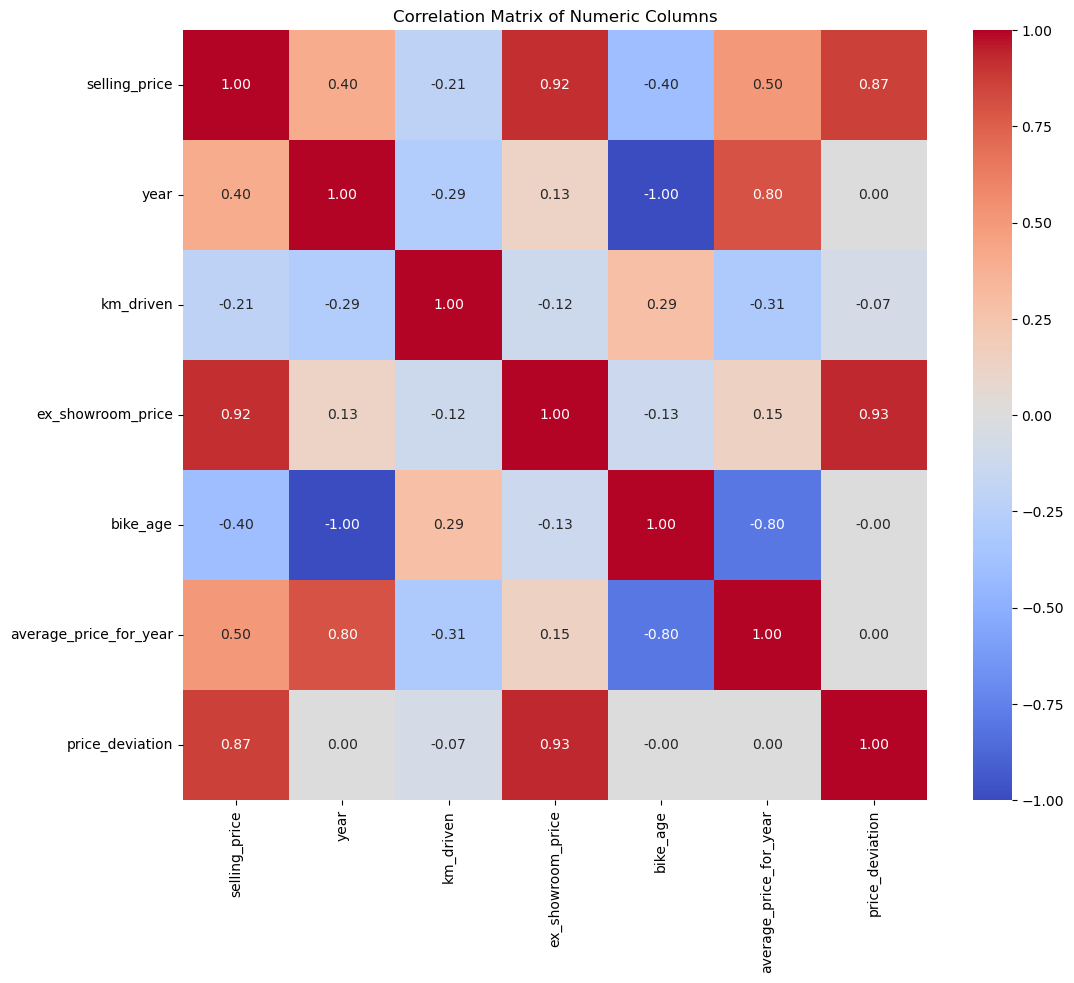

In [20]:
# Select only numeric columns
numeric_cols = df.loc[:, df.dtypes != 'object']
# Calculate the correlation matrix
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

### Car Sale Dataset (EDA - 2)

In [21]:
df = pd.read_csv('Car Sale.csv')

In [22]:
df.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [23]:
df.duplicated().sum()

0

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [25]:
df.rename(columns={'Price ($)': 'Price'}, inplace=True)

In [26]:
df.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [27]:
# splitting the Day/month/year using split().
#df['Date'] = df['Date'].str.split('/')

In [28]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

In [29]:
# creating the day , month , year columns seperate.
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Day'] = df['Date'].dt.day

In [30]:
df.drop(columns='Date', inplace=True)

Q1) What is the average selling price of cars for each dealer, and how does it compare across different dealers ?

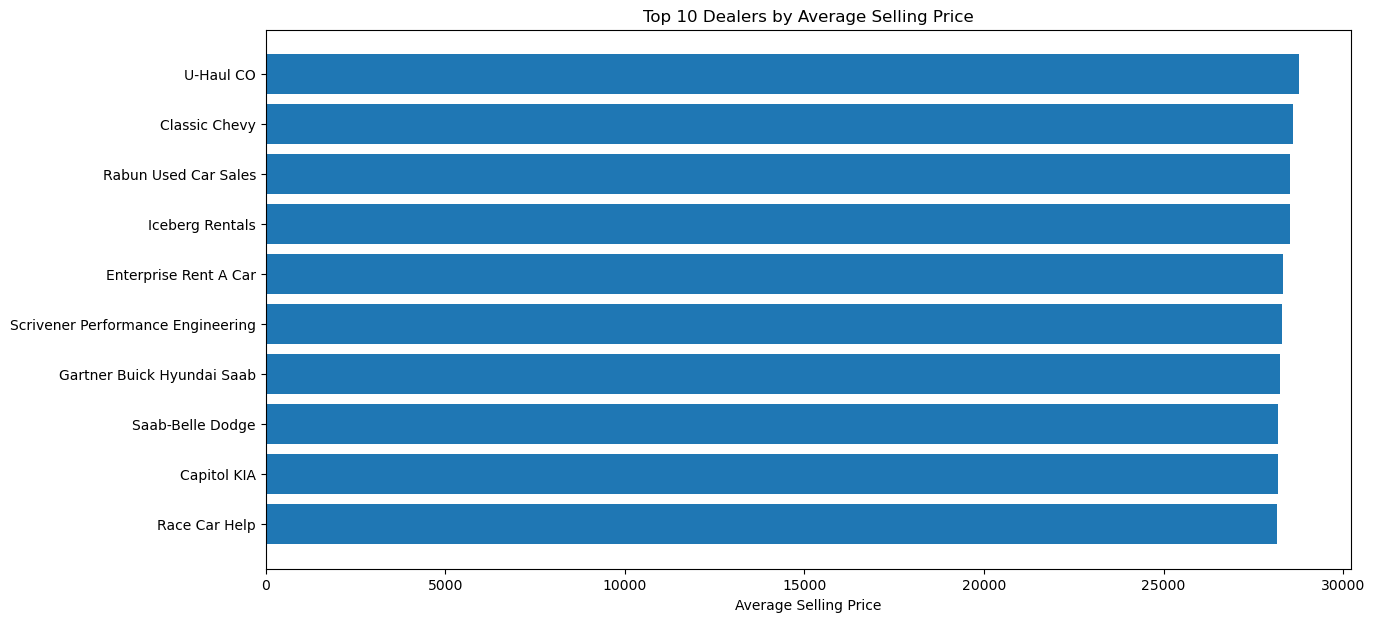

In [31]:
# Calculate average selling price per dealer
avg_price_per_dealer = df.groupby('Dealer_Name')['Price'].mean().reset_index()
avg_price_per_dealer = avg_price_per_dealer.sort_values(by='Price', ascending=False)

# Plot the top 10 dealers by average selling price
plt.figure(figsize=(14, 7))
plt.barh(avg_price_per_dealer['Dealer_Name'].head(10), avg_price_per_dealer['Price'].head(10))
plt.xlabel('Average Selling Price')
plt.title('Top 10 Dealers by Average Selling Price')
plt.gca().invert_yaxis()
plt.show()

Q2) Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
trends ?

Car brand with the highest price variation:
     Company  Price Std Dev
15  Lincoln   19658.050211


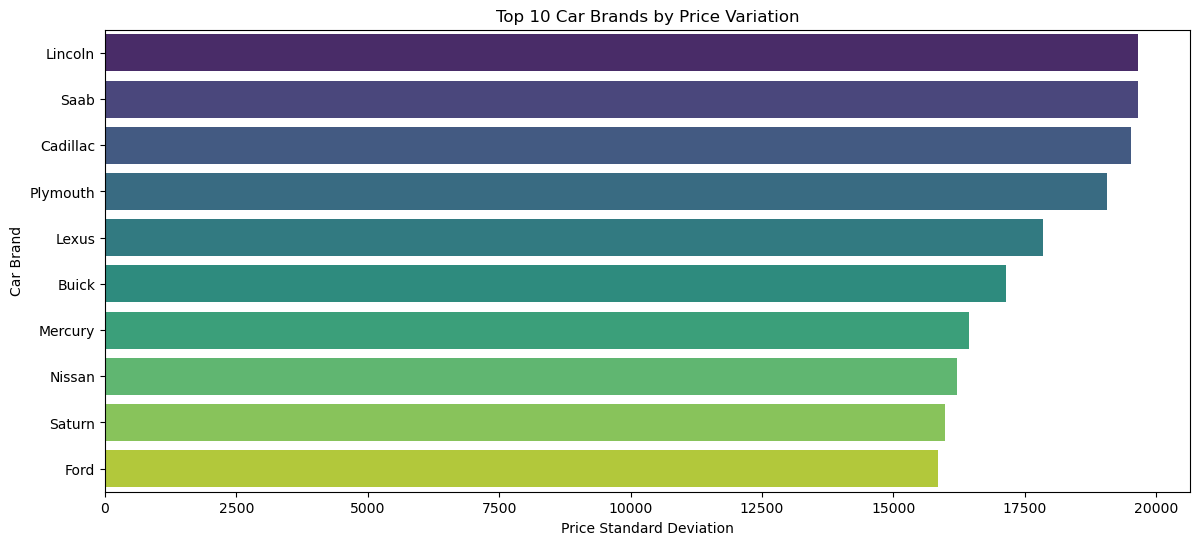

In [32]:
# Calculate price variation (standard deviation) for each company
price_variation = df.groupby('Company')['Price'].std().reset_index()
price_variation = price_variation.rename(columns={'Price': 'Price Std Dev'})

# Find the company with the highest price variation
highest_variation = price_variation.sort_values(by='Price Std Dev', ascending=False).head(1)
print("Car brand with the highest price variation:\n", highest_variation)

# Visualization: Price variation across companies
plt.figure(figsize=(14, 6))
sns.barplot(data=price_variation.sort_values(by='Price Std Dev', ascending=False).head(10), x='Price Std Dev', y='Company', palette='viridis')
plt.title('Top 10 Car Brands by Price Variation')
plt.xlabel('Price Standard Deviation')
plt.ylabel('Car Brand')
plt.show()

Q3) What is the distribution of car prices for each transmission type, and how do the interquartile ranges
compare ?

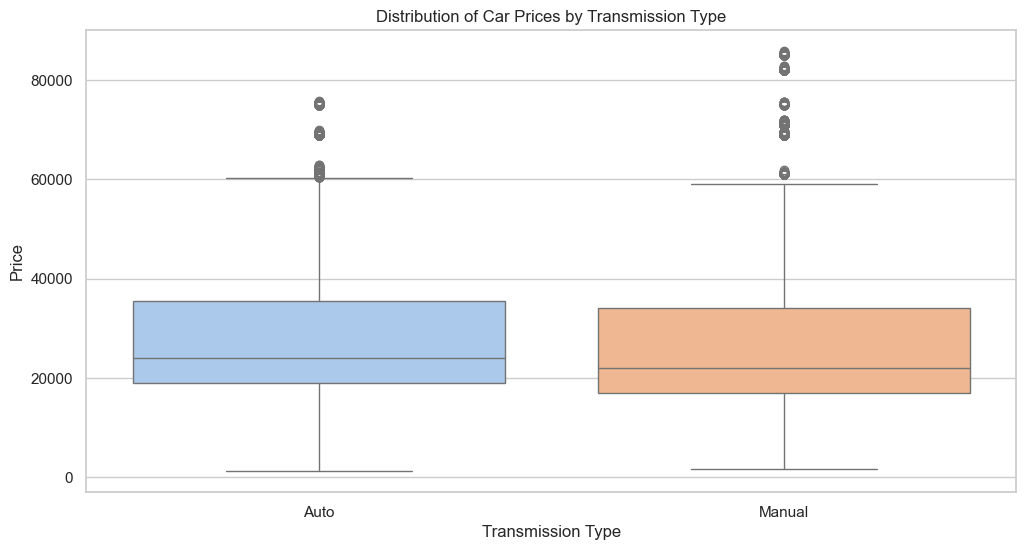

Interquartile Ranges (IQRs) for each transmission type:
 Transmission
Auto      16500.0
Manual    17000.0
Name: Price, dtype: float64


In [33]:
# Set the plot style
sns.set(style="whitegrid")

# Create a boxplot to show distribution of car prices by transmission type
plt.figure(figsize=(12, 6))
sns.boxplot(data = df, x='Transmission', y='Price', palette='pastel')
plt.title('Distribution of Car Prices by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price')
plt.show()

# Calculate and compare IQRs
transmission_iqr = df.groupby('Transmission')['Price'].agg(lambda x: x.quantile(0.75) - x.quantile(0.25))
print("Interquartile Ranges (IQRs) for each transmission type:\n", transmission_iqr)

Q4) What is the distribution of car prices across different regions ?

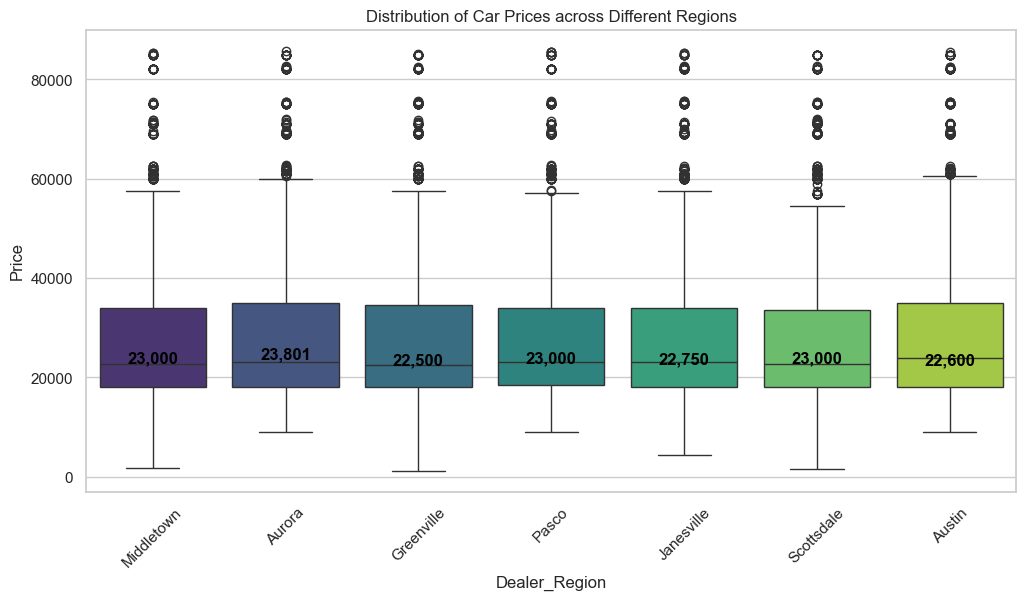

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dealer_Region', y='Price', data = df, palette='viridis')
plt.title('Distribution of Car Prices across Different Regions')
plt.xlabel('Dealer_Region')
plt.ylabel('Price')
plt.xticks(rotation = 45)

# Add median values to the boxes
medians = df.groupby('Dealer_Region')['Price'].median()
for i, region in enumerate(medians.index):
    plt.text(i, medians[region], f'{medians[region]:,.0f}', horizontalalignment='center', color='black', weight='bold')
plt.show()

Q5) What is the distribution of cars based on body styles ?

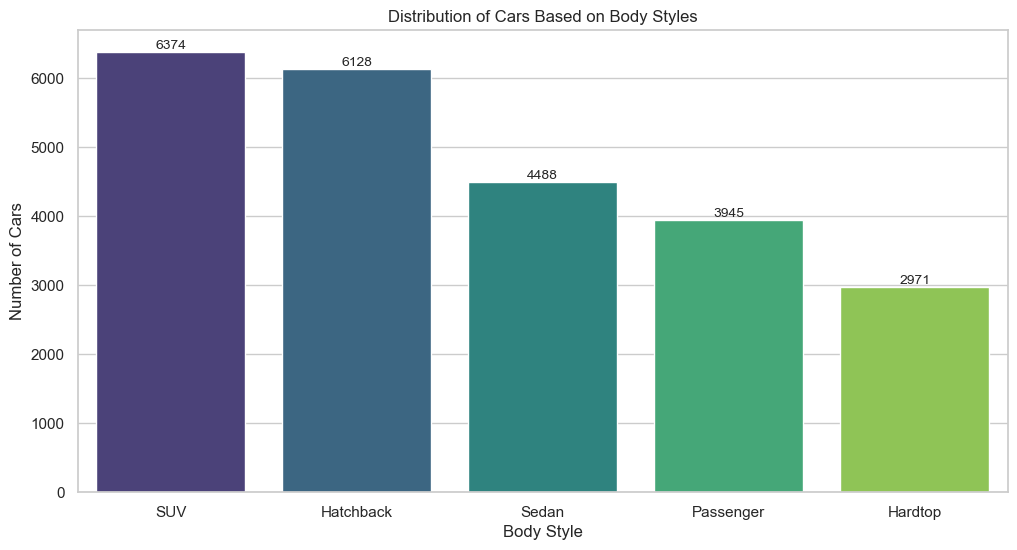

In [35]:
# Count the number of cars for each body style
body_style_counts = df['Body Style'].value_counts().reset_index()
body_style_counts.columns = ['Body Style', 'Count']

# Plot the distribution using a bar plot
plt.figure(figsize = (12, 6))
sns.barplot(data = body_style_counts, x ='Body Style', y ='Count', palette ='viridis')
plt.title('Distribution of Cars Based on Body Styles')
plt.xlabel('Body Style')
plt.ylabel('Number of Cars')

# Add count labels on top of bars
for index, row in body_style_counts.iterrows():
    plt.text(index, row['Count'] + 50, row['Count'], ha='center', fontsize = 10)

plt.show()

Q6) How does the average selling price of cars vary by customer gender and annual income ?

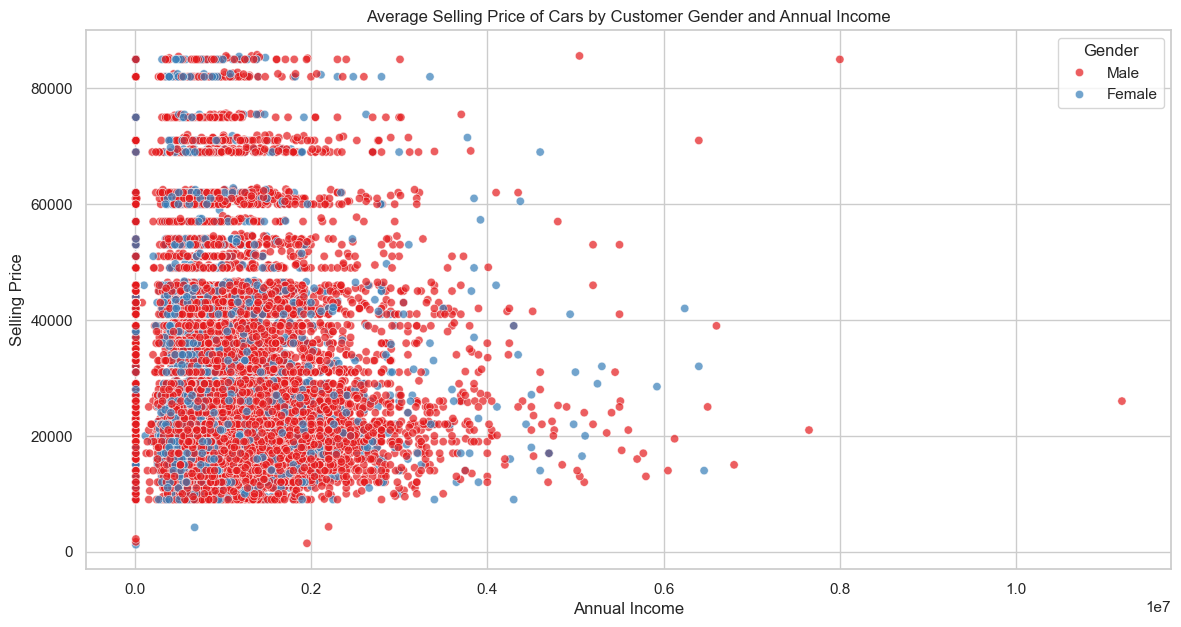

In [36]:
# Create a scatter plot to show the relationship between Annual Income, Gender, and Average Selling Price
plt.figure(figsize=(14, 7))
sns.scatterplot(data = df, x='Annual Income', y='Price', hue='Gender', alpha=0.7, palette='Set1')
plt.title('Average Selling Price of Cars by Customer Gender and Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Selling Price')
plt.legend(title='Gender')
plt.show()

Q7) What is the distribution of car prices by region, and how does the number of cars sold vary by region ?

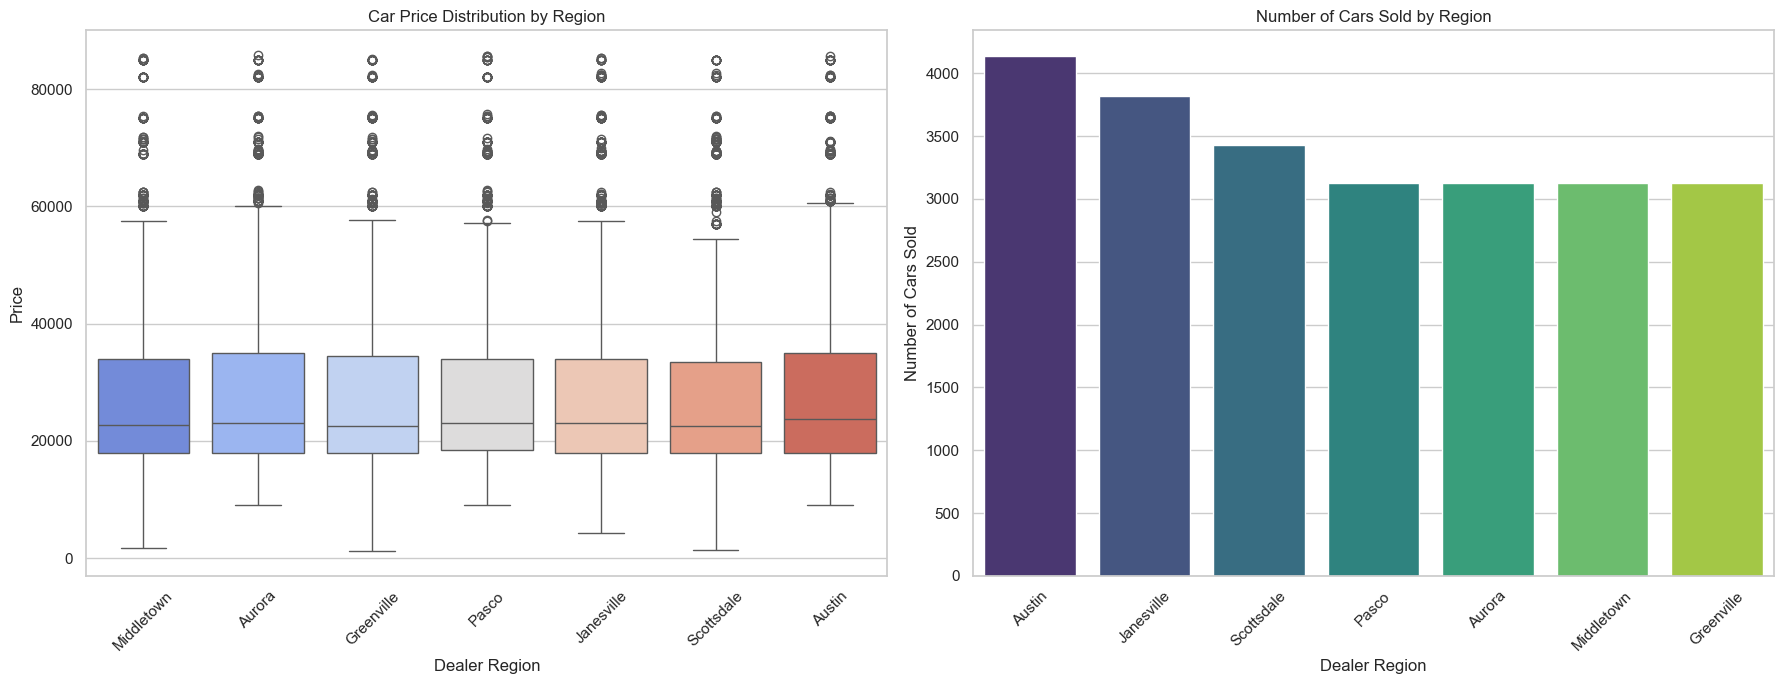

In [37]:
# Create a figure with two subplots: boxplot for price distribution & barplot for number of cars sold
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Boxplot for car price distribution by region
sns.boxplot(data = df, x='Dealer_Region', y='Price', palette='coolwarm', ax=axes[0])
axes[0].set_title('Car Price Distribution by Region')
axes[0].set_xlabel('Dealer Region')
axes[0].set_ylabel('Price')
axes[0].tick_params(axis='x', rotation=45)

# Barplot for number of cars sold by region
region_counts = df['Dealer_Region'].value_counts().reset_index()
region_counts.columns = ['Dealer_Region', 'Number of Cars Sold']
sns.barplot(data=region_counts, x='Dealer_Region', y='Number of Cars Sold', palette='viridis', ax=axes[1])
axes[1].set_title('Number of Cars Sold by Region')
axes[1].set_xlabel('Dealer Region')
axes[1].set_ylabel('Number of Cars Sold')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Q8) How does the average car price differ between cars with different engine sizes ?

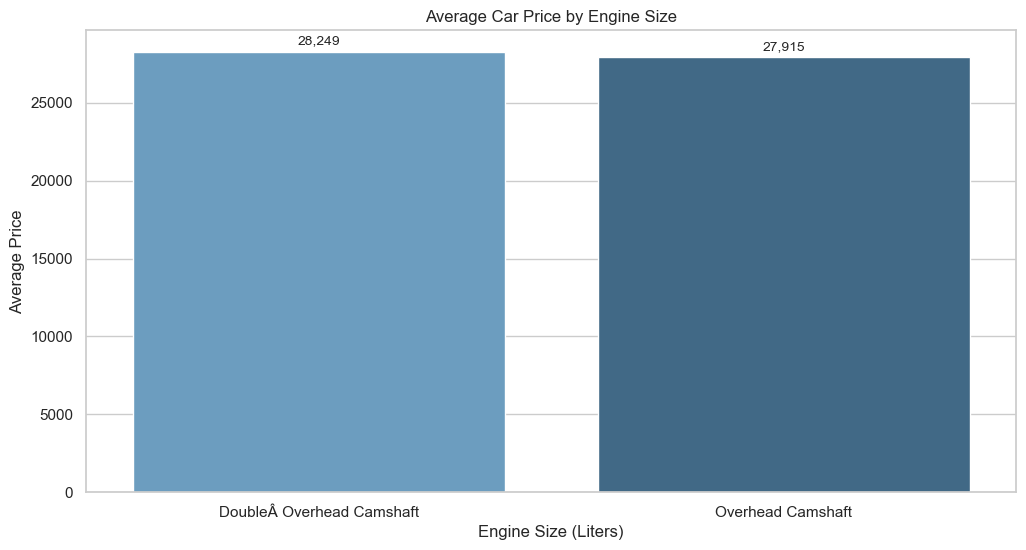

In [38]:
# Calculate average price for each engine size
engine_price_avg = df.groupby('Engine')['Price'].mean().reset_index()

# Plot the average price by engine size
plt.figure(figsize=(12, 6))
sns.barplot(data=engine_price_avg, x='Engine', y='Price', palette='Blues_d')
plt.title('Average Car Price by Engine Size')
plt.xlabel('Engine Size (Liters)')
plt.ylabel('Average Price')

# Add data labels on bars
for index, row in engine_price_avg.iterrows():
    plt.text(index, row['Price'] + 500, f'{row["Price"]:,.0f}', ha='center', fontsize=10)

plt.show()

Q9)  How do car prices vary based on the customers annual income bracket ?

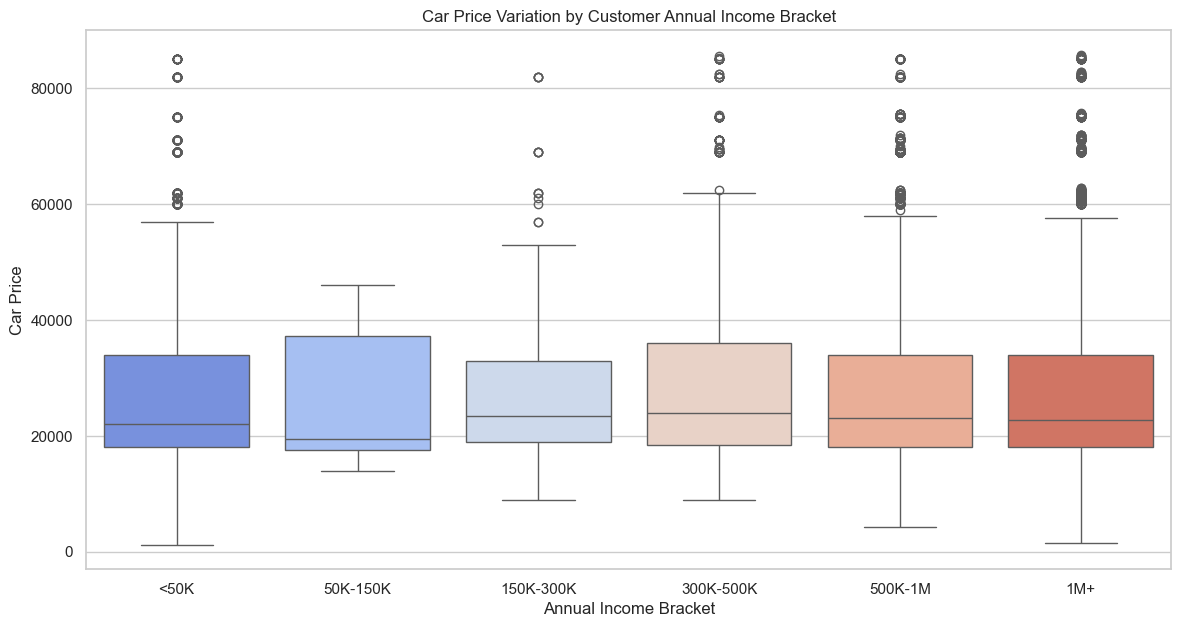

In [39]:
# Create income brackets for analysis
Income_Bracket = pd.cut(df['Annual Income'],
                                        bins=[0, 50000, 150000, 300000, 500000, 1000000, 2000000],
                                        labels=['<50K', '50K-150K', '150K-300K', '300K-500K', '500K-1M', '1M+'])

# Boxplot to show price variation across income brackets
plt.figure(figsize=(14, 7))
sns.boxplot(data = df, x=Income_Bracket, y='Price', palette='coolwarm')
plt.title('Car Price Variation by Customer Annual Income Bracket')
plt.xlabel('Annual Income Bracket')
plt.ylabel('Car Price')
plt.show()

Q10) What are the top 5 car models with the highest number of sales, and how does their price distribution look ?

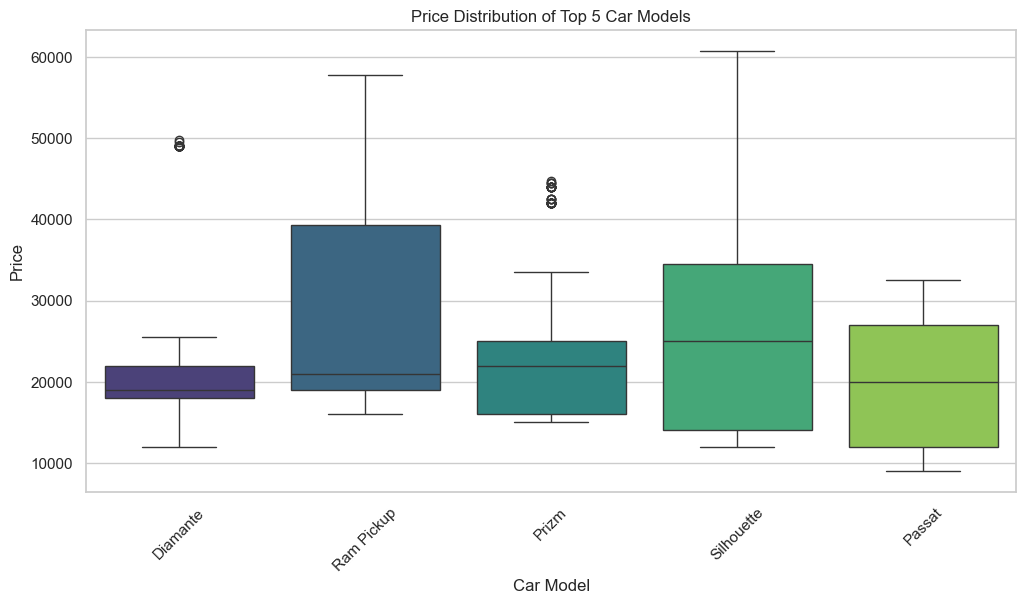

In [40]:
# Calculate the sales count for each car model
top_models = df['Model'].value_counts().head(5)

# Filter the DataFrame to include only the top 5 models
top_models = df[df['Model'].isin(top_models.index)]

# Plot the price distribution for each of the top 5 models
plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='Price', data=top_models, palette='viridis')
plt.title('Price Distribution of Top 5 Car Models')
plt.xlabel('Car Model')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

Q11) How does car price vary with engine size across different car colors, and which colors have the highest price
variation ?

The color with the highest price variation is: Pale White


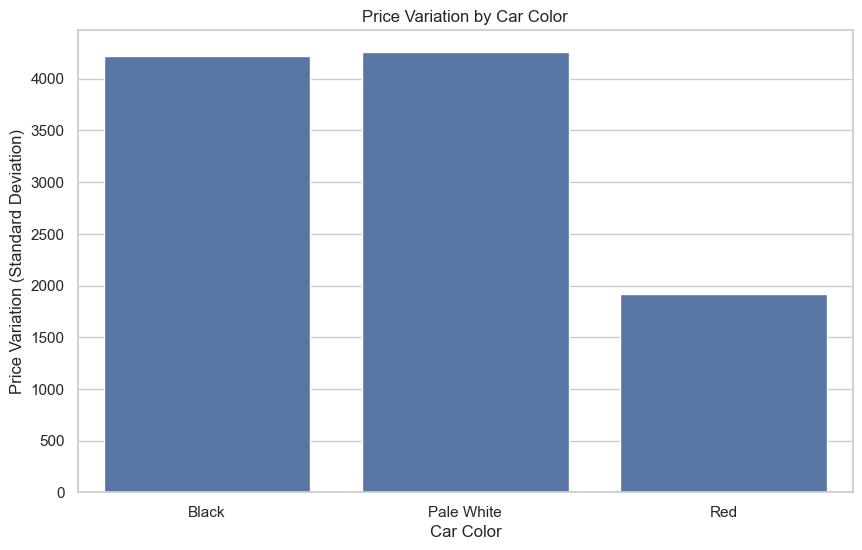

In [41]:
color_engine_price = df.groupby(['Color', 'Engine'])['Price'].mean().reset_index()

# Pivot the table to have colors as rows and engine sizes as columns
color_engine_pivot = color_engine_price.pivot(index='Color', columns='Engine', values='Price')

# Calculate the price variation (standard deviation) for each color
color_price_variation = color_engine_pivot.std(axis=1)

# Find the color with the highest price variation
highest_variation_color = color_price_variation.idxmax()

# Print the color with the highest variation
print(f"The color with the highest price variation is: {highest_variation_color}")

# Visualization a bar plot of color_price_variation:
plt.figure(figsize=(10, 6))
sns.barplot(x=color_price_variation.index, y=color_price_variation.values)
plt.title('Price Variation by Car Color')
plt.xlabel('Car Color')
plt.ylabel('Price Variation (Standard Deviation)')
plt.xticks()
plt.show()

Q12) Is there any seasonal trend in car sales based on the date of sale ?

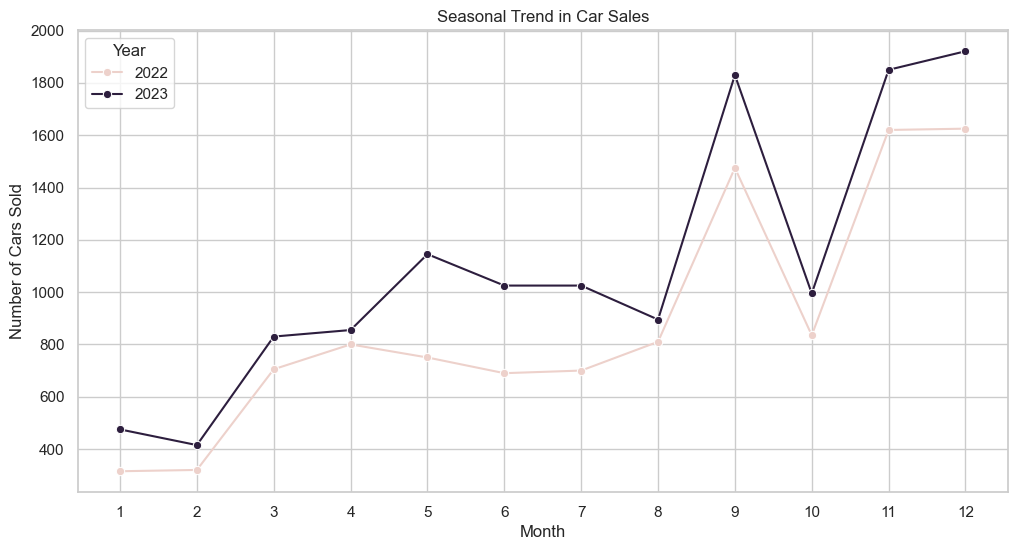

In [42]:
# Count car sales by Month and Year
monthly_sales = df.groupby(['Year', 'Month']).size().reset_index(name='Sales')

# Plotting the seasonal trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', hue='Year', marker='o')
plt.title('Seasonal Trend in Car Sales')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.grid(True)
plt.show()

Q13) How does the car price distribution change when considering different combinations of body style and
transmission type ?

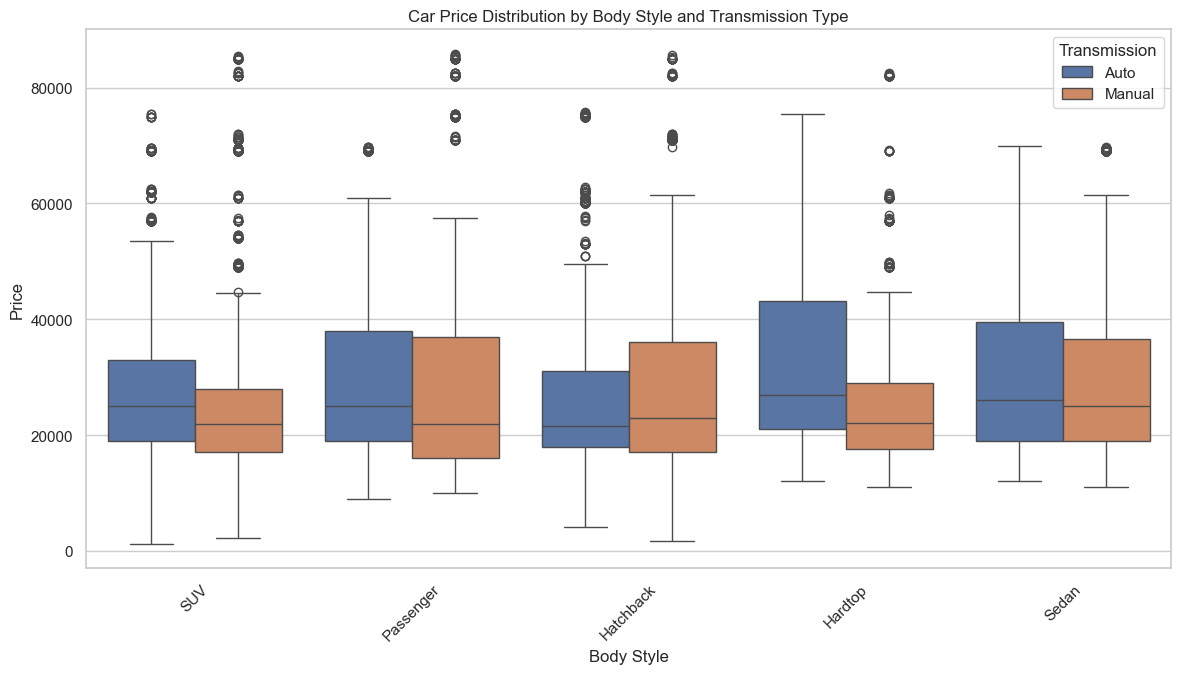

In [43]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='Body Style', y='Price', hue='Transmission')
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style')
plt.ylabel('Price')
plt.legend(title='Transmission')
plt.xticks(rotation=45)
plt.show()

Q14) What is the correlation between car price and annual income of customers, and how do these features interact ?

                  Price  Annual Income
Price          1.000000       0.012065
Annual Income  0.012065       1.000000


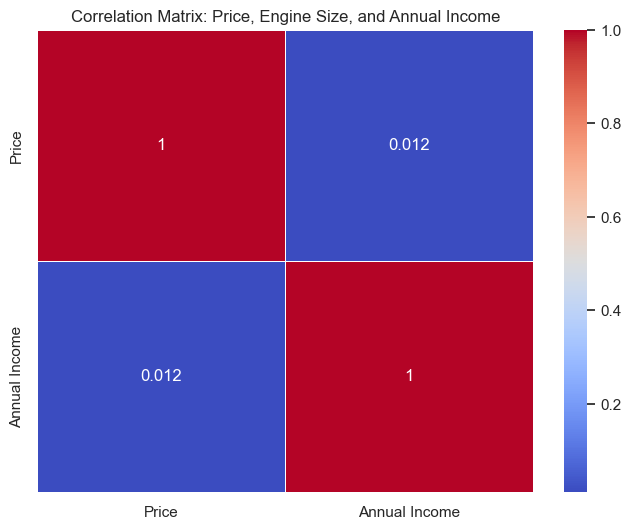

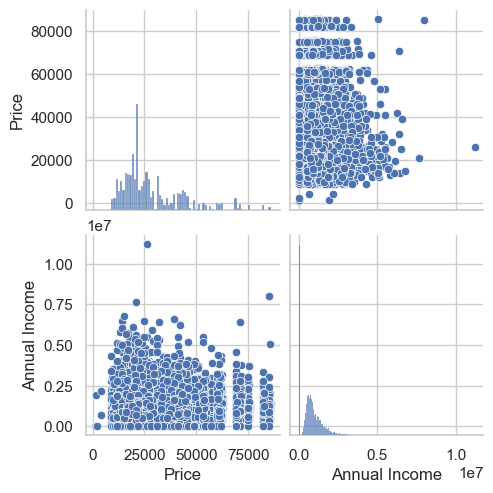

In [44]:
correlation_df = df[['Price', 'Annual Income']]
correlation_matrix = correlation_df.corr()
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix: Price, Engine Size, and Annual Income')
plt.show()

sns.pairplot(df[['Price', 'Annual Income']])
plt.show()

Q15) How does the average car price vary across different car models and engine types ?

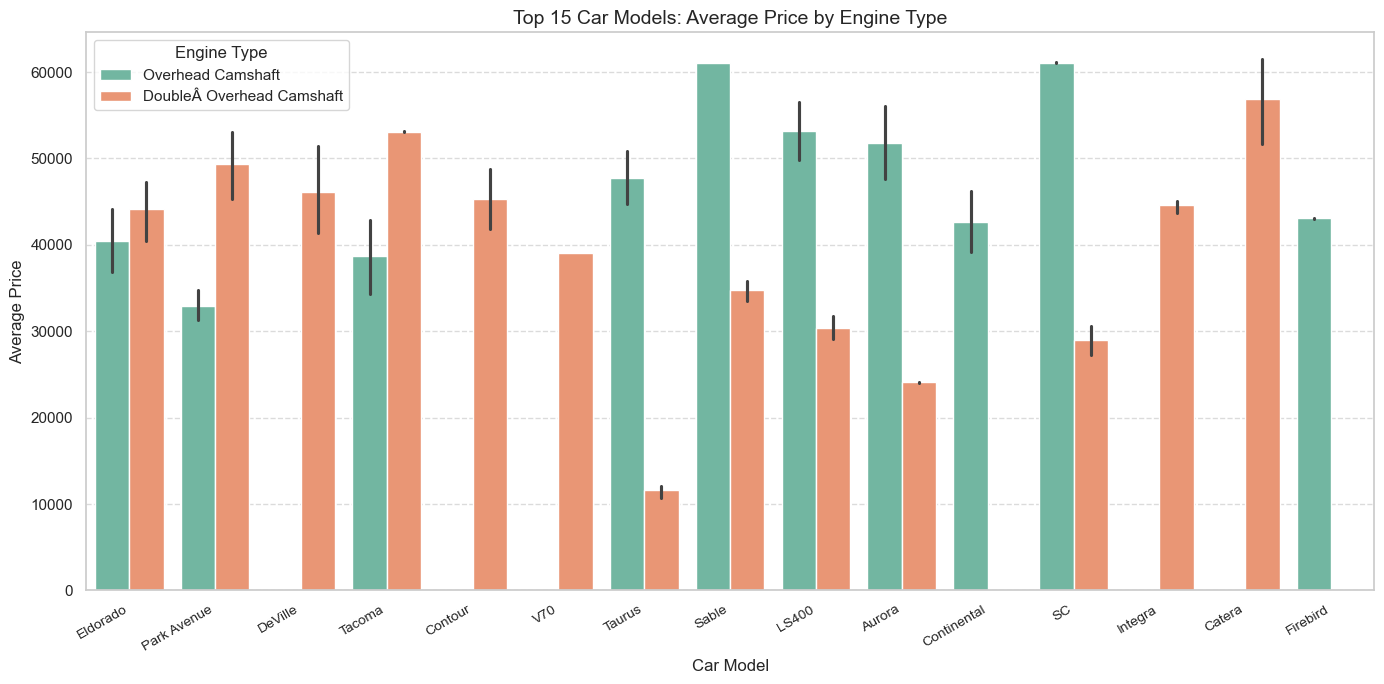

In [45]:
# Filter top 15 models based on average price
top_models = df.groupby('Model')['Price'].mean().nlargest(15).index
filtered_df = df[df['Model'].isin(top_models)]

# Plotting the cleaned graph
plt.figure(figsize=(14, 7))
sns.barplot(data=filtered_df, x='Model', y='Price', hue='Engine', palette='Set2', dodge=True)

# Customizations for clarity
plt.title('Top 15 Car Models: Average Price by Engine Type', fontsize=14)
plt.xlabel('Car Model', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.legend(title='Engine Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

### Amazon Sales (EDA - 3)

In [46]:
df = pd.read_csv('amazon.csv')

In [47]:
df.head(1)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...


In [48]:
df.shape

(1465, 16)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [50]:
df.duplicated().sum()

0

In [51]:
# List of columns to convert
num_cols = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']

# Clean and convert numeric columns
for col in num_cols:
    df[col] = df[col].astype(str)  # Ensure all data is treated as string first
    df[col] = df[col].str.replace('₹', '', regex=False)    # Remove ₹
    df[col] = df[col].str.replace(',', '', regex=False)    # Remove commas
    df[col] = df[col].str.replace('%', '', regex=False)    # Remove %
    df[col] = df[col].str.strip()                          # Remove leading/trailing spaces
    df[col] = pd.to_numeric(df[col], errors='coerce')      # Convert to numeric

# Check the updated DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   int64  
 6   rating               1464 non-null   float64
 7   rating_count         1463 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

In [52]:
df.drop(['img_link', 'product_link', 'user_name', 'product_id', 'user_id', 'review_id'],axis = 1, inplace = True, errors = 'coerce')

In [53]:
df.sample(5)

,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_title,review_content
215,Karbonn 80 cm (32 Inches) Millennium Series HD...,"Electronics|HomeTheater,TV&Video|Televisions|S...",6999.0,16990.0,59,3.8,110.0,Resolution: HD Ready (1366x768) | Reresh Rate ...,"Nice,Nice product,Value for money,Karbonn,Good...","Nice product,Nice product,Ok good,,Good,अच्छा,..."
1040,"Morphy Richards OFR Room Heater, 09 Fin 2000 W...","Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",6549.0,13999.0,53,4.0,2961.0,The oil-filled radiator with 9 fins will ensur...,"Good product and recommend too,Good Purchase,I...",During winter it keeps room temperature hot wh...
804,boAt Stone 650 10W Bluetooth Speaker with Upto...,Electronics|HomeAudio|Speakers|BluetoothSpeakers,1799.0,4990.0,64,4.2,41226.0,Experience the true immersive sound with a pum...,Sound Quality : Boat Stone 650 vs Nakamichi Sp...,This is review is primarily focused on sound q...
853,Logitech Pebble M350 Wireless Mouse with Bluet...,Computers&Accessories|Accessories&Peripherals|...,1490.0,2295.0,35,4.6,10652.0,"Modern, slim and beautiful Pebble shape Logite...","Sleek and battery efficient!,It's made for erg...",It's a good bluetooth mouse. Connects within 1...
275,LOHAYA Voice Assistant Remote Compatible for A...,"Electronics|HomeTheater,TV&Video|Accessories|R...",399.0,999.0,60,3.3,23.0,100% Best Quality Plastic Body and Soft Silico...,When I placed the order I was in doubt whether...,"Ok,Very disappointedRange is not good it doesn..."


In [54]:
# Extract primary category if multiple levels exist
df['main_category'] = df['category'].str.split('|').str[0]

df.isnull().sum()

product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 1
rating_count           2
about_product          0
review_title           0
review_content         0
main_category          0
dtype: int64

In [55]:
df = df.fillna(0)

In [56]:
df.sample(5)

,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_title,review_content,main_category
296,"Smashtronics® - Case for Firetv Remote, Fire S...","Electronics|HomeTheater,TV&Video|Accessories|R...",199.0,399.0,50,4.2,1335.0,【100% Fits】Specially designed for Fire TV Stic...,"Cover is Little loose for Fire remote cover,I ...","All is good except little loose cover,I ordere...",Electronics
678,Tizum Mouse Pad/ Computer Mouse Mat with Anti-...,Computers&Accessories|Accessories&Peripherals|...,169.0,299.0,43,4.4,5176.0,9.4 Inches X 7.9 Inches) 240mm x 200mm x 2mm S...,"Nice product,Size is not to big not to small,I...","Nice product,if you want to use your mouse for...",Computers&Accessories
62,Lapster 1.5 mtr USB 2.0 Type A Male to USB A M...,Computers&Accessories|Accessories&Peripherals|...,139.0,999.0,86,4.0,1313.0,Plug & Play|Stable & Reliable Connectivity.|Sp...,"A well-priced product.,Lenthy cord.,Product is...","i am writing this review after 2 months, the f...",Computers&Accessories
379,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,999.0,80,3.9,7928.0,【 Fast Charger& Data Sync】-With built-in safet...,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",Computers&Accessories
17,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,249.0,399.0,38,4.0,43994.0,"Compatible with all Type C enabled devices, be...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,Computers&Accessories


In [57]:
df.drop('category', axis = 1, inplace = True)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_name         1465 non-null   object 
 1   discounted_price     1465 non-null   float64
 2   actual_price         1465 non-null   float64
 3   discount_percentage  1465 non-null   int64  
 4   rating               1465 non-null   float64
 5   rating_count         1465 non-null   float64
 6   about_product        1465 non-null   object 
 7   review_title         1465 non-null   object 
 8   review_content       1465 non-null   object 
 9   main_category        1465 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 114.6+ KB


In [59]:
df.rename(columns={'main_category': 'category'}, inplace=True)

In [61]:
df.head(1)

,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_title,review_content,category
0,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,64,4.2,24269.0,High Compatibility : Compatible With iPhone 12...,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,Computers&Accessories


#### Q1) What is the average rating for each product category ?

In [62]:
Avg_rating = df.groupby('category')['rating'].mean().reset_index()
Avg_rating = Avg_rating.sort_values(by = 'rating', ascending = False) #sorting values
print(Avg_rating)

                category    rating
7         OfficeProducts  4.309677
8             Toys&Games  4.300000
5        HomeImprovement  4.250000
1  Computers&Accessories  4.154967
2            Electronics  4.081749
4           Home&Kitchen  4.031696
3    Health&PersonalCare  4.000000
6     MusicalInstruments  3.900000
0          Car&Motorbike  3.800000


#### Q2) What are the top rating_count products by category ?

In [63]:
# Find the top product per category based on rating_count
top_by_category = df.loc[df.groupby('category')['rating_count'].idxmax()]

# Sort by rating_count and select top 6
top_6_products = top_by_category.sort_values(by='rating_count', ascending=False).head(6)

# Display the result
print(top_6_products[['category', 'rating_count']])

                   category  rating_count
12              Electronics      426973.0
1028           Home&Kitchen      270563.0
588   Computers&Accessories      253105.0
613      MusicalInstruments       68664.0
924              Toys&Games       15867.0
659          OfficeProducts       12179.0


#### Q3) What is the distribution of discounted prices vs. actual prices ?

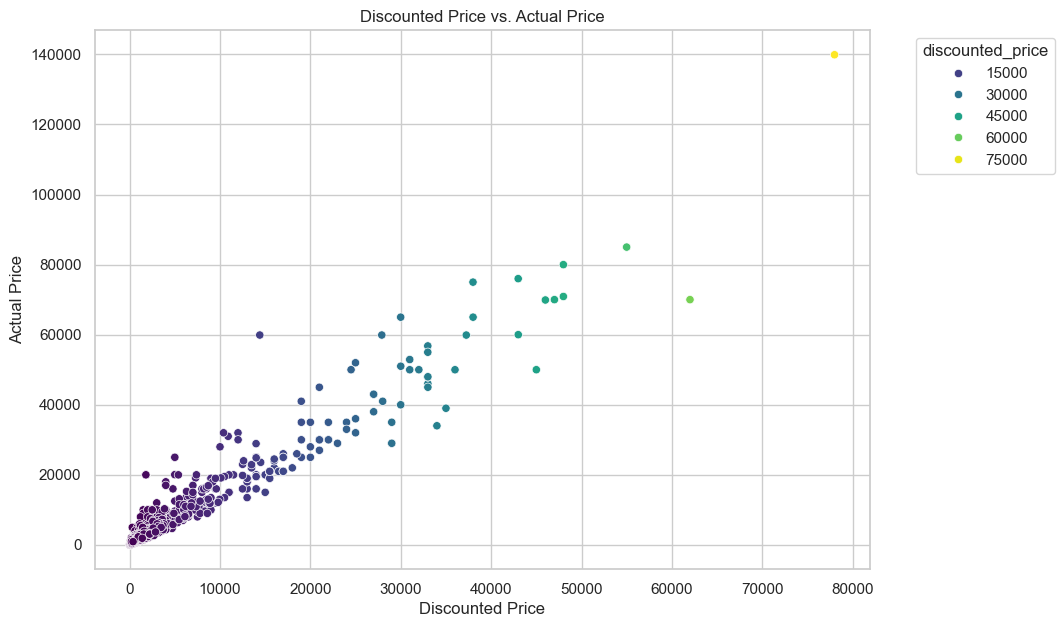

In [65]:
# Create the scatter plot
plt.figure(figsize=(10, 7))
sns.scatterplot(x='discounted_price', y='actual_price', data=df, hue = 'discounted_price', palette='viridis')
plt.title('Discounted Price vs. Actual Price')
plt.xlabel('Discounted Price')
plt.ylabel('Actual Price')
plt.legend(title='discounted_price', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Insights >> The discounted price increases, the actual price also tends to increase. But most of the product falls under Budget Category.

#### Q4) How does the average discount percentage vary across categories ?

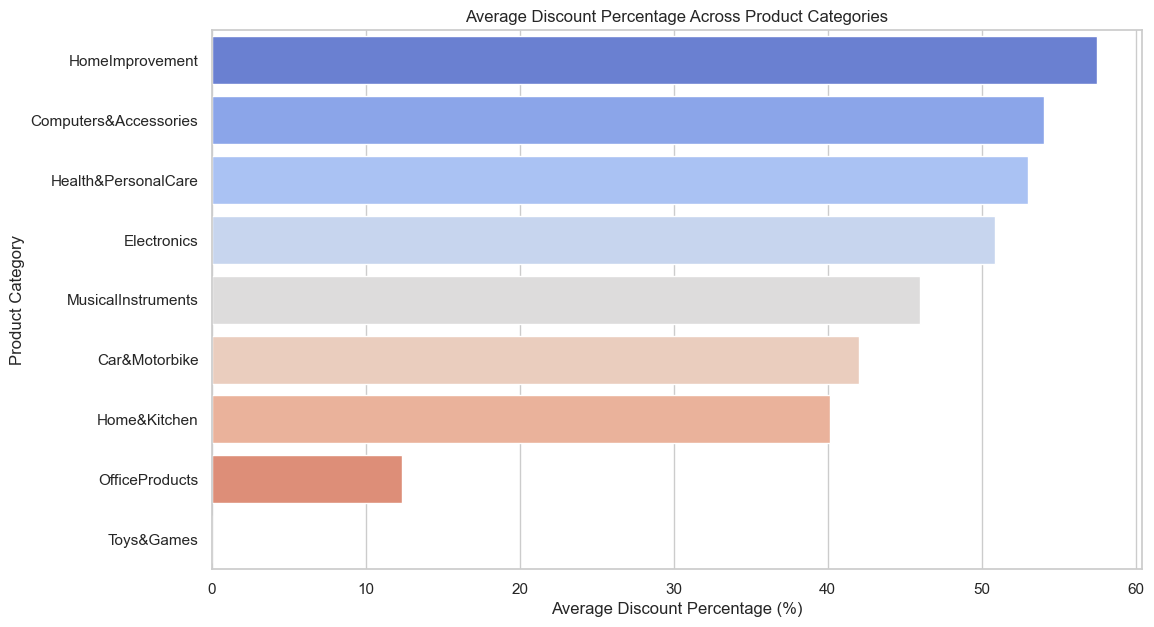

In [66]:
# Group by 'product_category' and calculate average discount percentage
avg_discount = df.groupby('category')['discount_percentage'].mean().reset_index().head(10)

# Sort by highest average discount
avg_discount = avg_discount.sort_values(by='discount_percentage', ascending=False)

# Plotting the average discount per category
plt.figure(figsize=(12, 7))
sns.barplot(data=avg_discount, x='discount_percentage', y='category', palette='coolwarm')
plt.title('Average Discount Percentage Across Product Categories')
plt.xlabel('Average Discount Percentage (%)')
plt.ylabel('Product Category')
plt.show()

### Insights - Max Discount is given on Home Improvement products then on computer & Accessories

#### Q5) What are the most popular product names ?

In [67]:
# Calculate average rating per product
top_rated_products = df.groupby('product_name')['rating'].mean().reset_index()

# Sort by highest average rating
top_rated_products = top_rated_products.sort_values(by='rating', ascending=False)

# Display top 10 highest-rated products
print(top_rated_products.head(10))

                                           product_name  rating
85    Amazon Basics Wireless Mouse | 2.4 GHz Connect...     5.0
875   REDTECH USB-C to Lightning Cable 3.3FT, [Apple...     5.0
1050  Syncwire LTG to USB Cable for Fast Charging Co...     5.0
746   Oratech Coffee Frother electric, milk frother ...     4.8
506   Instant Pot Air Fryer, Vortex 2QT, Touch Contr...     4.8
1048  Swiffer Instant Electric Water Heater Faucet T...     4.8
1241  Zuvexa USB Rechargeable Electric Foam Maker - ...     4.7
241   Campfire Spring Chef Prolix Instant Portable W...     4.7
368   FIGMENT Handheld Milk Frother Rechargeable, 3-...     4.7
1018  Sony Bravia 164 cm (65 inches) 4K Ultra HD Sma...     4.7


### Insights - Most rated product are from Electronics

#### Q6) What are the most popular product keywords ?

In [68]:
# Combine all product names into one string
all_product_names = ' '.join(df['product_name'].astype(str))

# Split into individual words and convert to lowercase
words = all_product_names.lower().split()

# Create a DataFrame from the word list
words_df = pd.DataFrame(words, columns=['word'])

# Remove common stopwords
stopwords = ['for', '(black)', 'with', 'the', 'of', 'to', 'and', 'c', 'by', 'from', '|', '&', '-']
words_df = words_df[~words_df['word'].isin(stopwords)]

# Count word frequency
word_counts = words_df['word'].value_counts()

# Display top 10 keywords
print(word_counts.head(10))

word
usb           377
cable         320
charging      219
fast          211
smart         171
type          144
tv            138
compatible    138
data          131
hd            130
Name: count, dtype: int64


#### Q7) What are the most popular product reviews ?

In [69]:
# Sort reviews based on highest ratings
if 'rating' in df.columns and 'review_title' in df.columns:
    top_rated_reviews = df.sort_values(by='rating', ascending=False)[['review_title', 'rating']].dropna().head(10)
    print(top_rated_reviews)
else:
    print("The required columns ('reviews' and 'ratings') are not available.")

                                           review_title  rating
324                                     Awesome Product     5.0
174   Good,Superb quality,Good products  nice one,Wo...     5.0
775   Very responsive and stylish mouse,Simply Aweso...     5.0
1145  Best Product,It’s expansive but it works well ...     4.8
1201  Oratech Best Coffee Frother,Great,My review ab...     4.8
1299  Loved it,Good product,Good product,It's easy t...     4.8
249   Product installation was excellent  but delive...     4.7
1388  Felt very useful 👌 but cable is short,Good in ...     4.7
1226  Little kitchen helper,An amazing product,Very ...     4.7
459   Easy to install,Best screen guard and the easi...     4.7


#### Q8) What is the correlation between discounted_price and rating ?

Correlation between Discounted Price and Ratings: 0.11


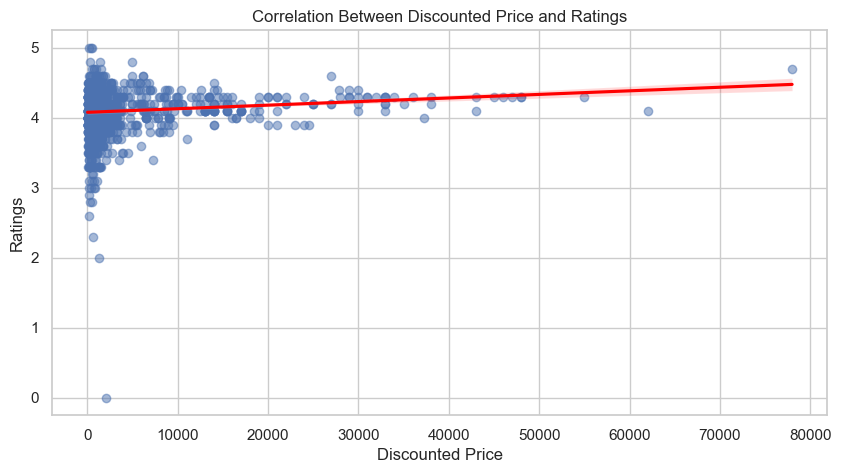

In [71]:
# Calculate the correlation
correlation = df['discounted_price'].corr(df['rating'])
print(f"Correlation between Discounted Price and Ratings: {correlation:.2f}")

# Plot the correlation using a scatter plot with regression line
plt.figure(figsize=(10, 5))
sns.regplot(x='discounted_price', y='rating', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Correlation Between Discounted Price and Ratings')
plt.xlabel('Discounted Price')
plt.ylabel('Ratings')
plt.show()

### Insights - More Discount, More Rating

#### Q9) What are the Top 5 categories based on the highest ratings ?

In [72]:
# Calculate average rating per category
avg_ratings = df.groupby('category')['rating'].mean().reset_index()

# Sort by highest average rating and select top 5
top_5_categories = avg_ratings.sort_values(by='rating', ascending=False).head(5)

print(top_5_categories)

                category    rating
7         OfficeProducts  4.309677
8             Toys&Games  4.300000
5        HomeImprovement  4.250000
1  Computers&Accessories  4.154967
2            Electronics  4.081749


#### Q10) Identify any potential areas for improvement or optimization based on the data analysis.

In [73]:
# Identifying areas for improvement based on low ratings and low discounts

# Products with low ratings (<3.5) and low discount (<30%)
low_rating_discount = df[(df['rating'] < 3.5) & (df['discount_percentage'] < 30)][['product_name', 'category', 'rating', 'discount_percentage']]

# Categories with average rating < 4 and discount < 40%
category_issues = df.groupby('category').agg({'rating': 'mean', 'discount_percentage': 'mean'}).reset_index()
category_issues = category_issues[(category_issues['rating'] < 4) & (category_issues['discount_percentage'] < 40)]

low_rating_discount.head()

,product_name,category,rating,discount_percentage
921,Canon PIXMA MG2577s All-in-One Inkjet Colour P...,Computers&Accessories,3.4,10
1279,Eureka Forbes car Vac 100 Watts Powerful Sucti...,Home&Kitchen,0.0,16
1374,KNYUC MART Mini Electric Handy Room Heater Com...,Home&Kitchen,3.3,22


### Spotify Data (EDA - 4)

In [75]:
df = pd.read_csv('spotify.csv')

In [76]:
df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


#### Q1) Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.

In [78]:
df.isnull().sum()

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

In [79]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [80]:
df.duplicated().sum()

0

#### Q2) What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

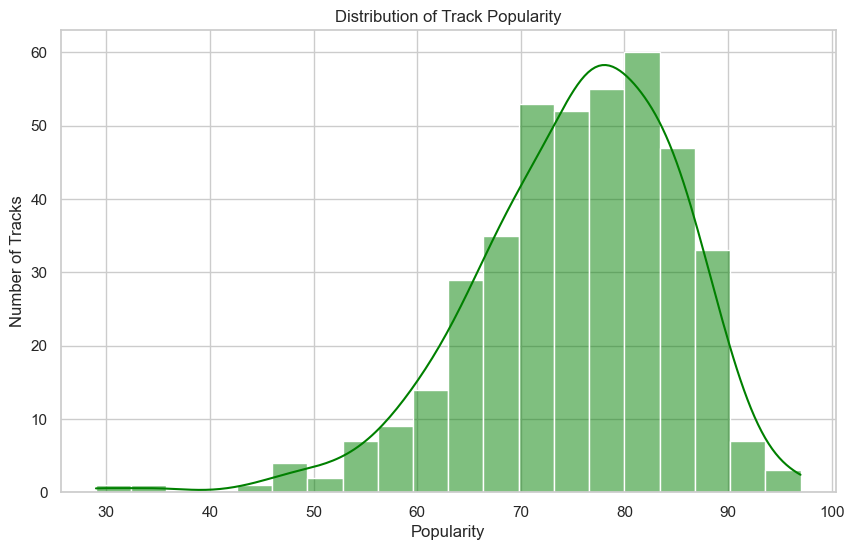

In [81]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Popularity'], bins=20, kde=True, color = 'Green')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Number of Tracks')
plt.show()

#### Q3) Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

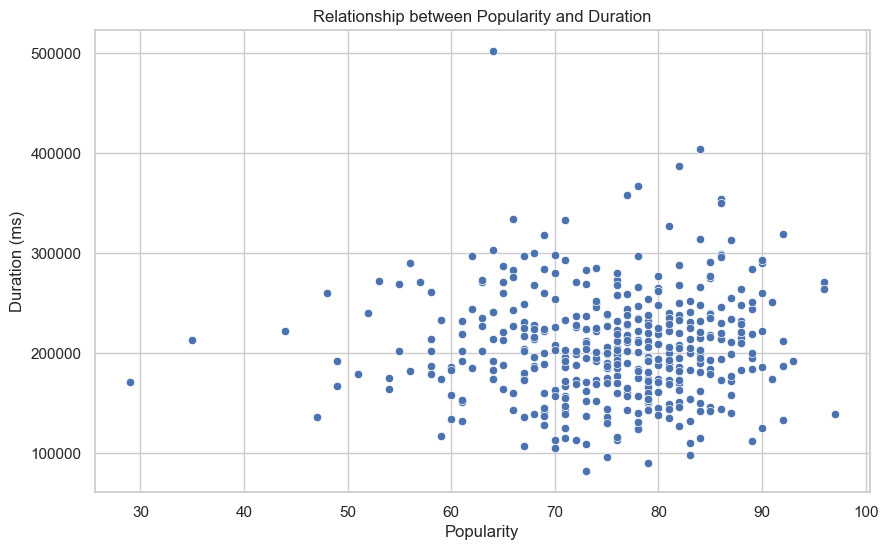

In [82]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x ='Popularity', y ='Duration (ms)', data = df)
plt.title('Relationship between Popularity and Duration')
plt.xlabel('Popularity')
plt.ylabel('Duration (ms)')
plt.show()

#### Q4) Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.

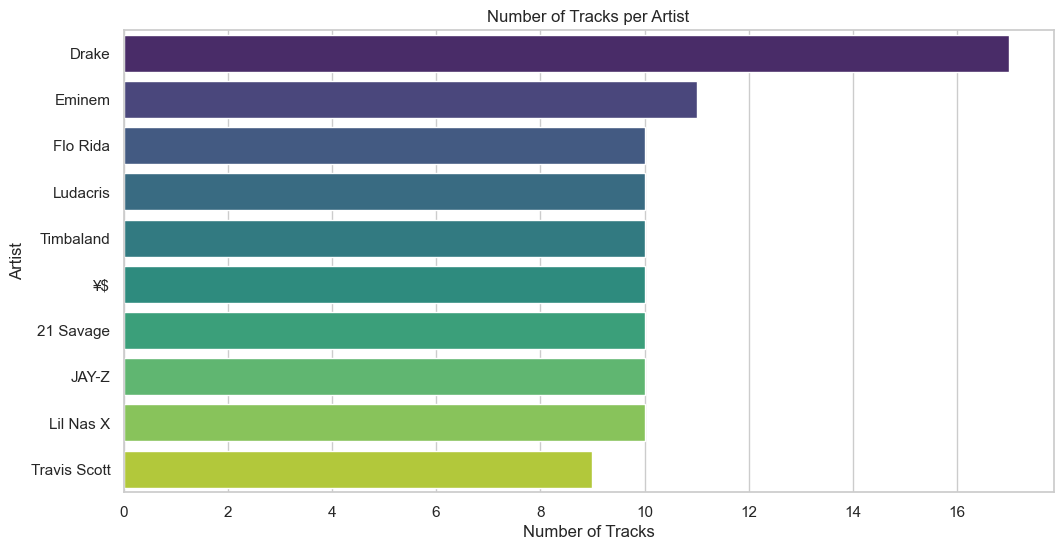

In [83]:
plt.figure(figsize = (12, 6))
sns.countplot(y ='Artist', data = df, order = df['Artist'].value_counts().head(10).index, palette ='viridis')
plt.title('Number of Tracks per Artist')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.show()

#### Q5) What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

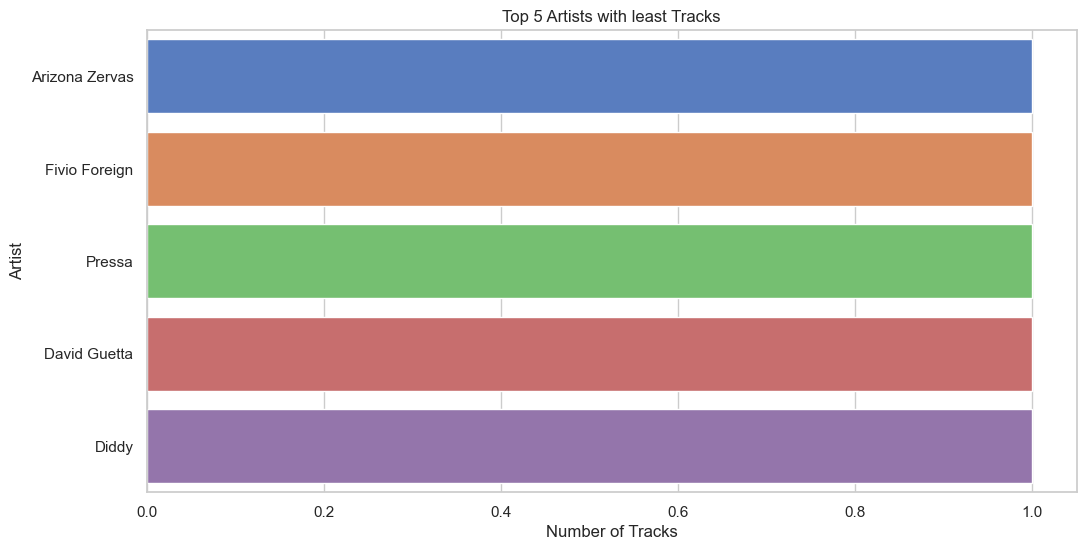

In [84]:
plt.figure(figsize=(12, 6))
top_5_least_artists = df['Artist'].value_counts().tail(5).index
sns.countplot(y='Artist', data=df[df['Artist'].isin(top_5_least_artists)], order= top_5_least_artists, palette='muted')
plt.title('Top 5 Artists with least Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.show()

#### Q6) Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.

In [85]:
top_5_artists = df['Artist'].value_counts().head(5).index

average_popularity = {}

for artist in top_5_artists:
    artist_tracks = df[df['Artist'] == artist]
    average_popularity[artist] = artist_tracks['Popularity'].mean()

for artist, popularity in average_popularity.items():
  print(f"Artist: {artist}, Average Popularity: {popularity}")

max_popularity_artist = max(average_popularity, key=average_popularity.get)
print(f"\nThe artist with the highest average popularity among the top 5 is: {max_popularity_artist}")

Artist: Drake, Average Popularity: 82.88235294117646
Artist: Eminem, Average Popularity: 83.63636363636364
Artist: Flo Rida, Average Popularity: 78.0
Artist: Ludacris, Average Popularity: 63.0
Artist: Timbaland, Average Popularity: 69.0

The artist with the highest average popularity among the top 5 is: Eminem


#### Q7) For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

In [86]:
top_5_artists = df['Artist'].value_counts().head(5).index

most_popular_track = {}

for artist in top_5_artists:
    artist_tracks = df[df['Artist'] == artist]
    most_popular_track[artist] = artist_tracks.loc[artist_tracks['Popularity'].idxmax(), 'Track Name']

for artist, track in most_popular_track.items():
    print(f"Artist: {artist}, Most Popular Track: {track}")

Artist: Drake, Most Popular Track: Rich Baby Daddy (feat. Sexyy Red & SZA)
Artist: Eminem, Most Popular Track: Without Me
Artist: Flo Rida, Most Popular Track: Low (feat. T-Pain)
Artist: Ludacris, Most Popular Track: My Chick Bad
Artist: Timbaland, Most Popular Track: The Way I Are


#### Q8) Visualize relationships between multiple numerical variables simultaneously using a pair plot.

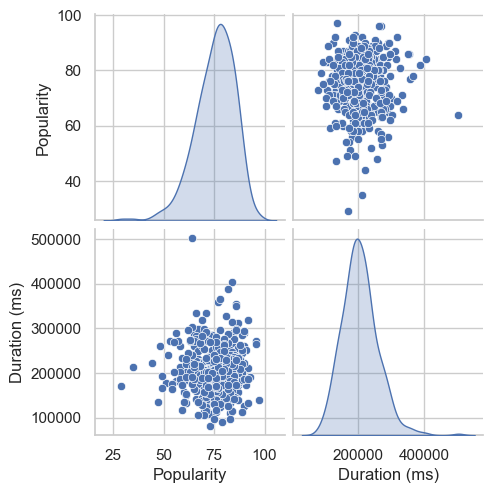

In [87]:
numerical_cols = ['Popularity', 'Duration (ms)']
sns.pairplot(df[numerical_cols], diag_kind='kde')
plt.show()

#### Q9) Does the duration of tracks vary significantly across different artists ? Explore this visually using a box plot or violin plot.

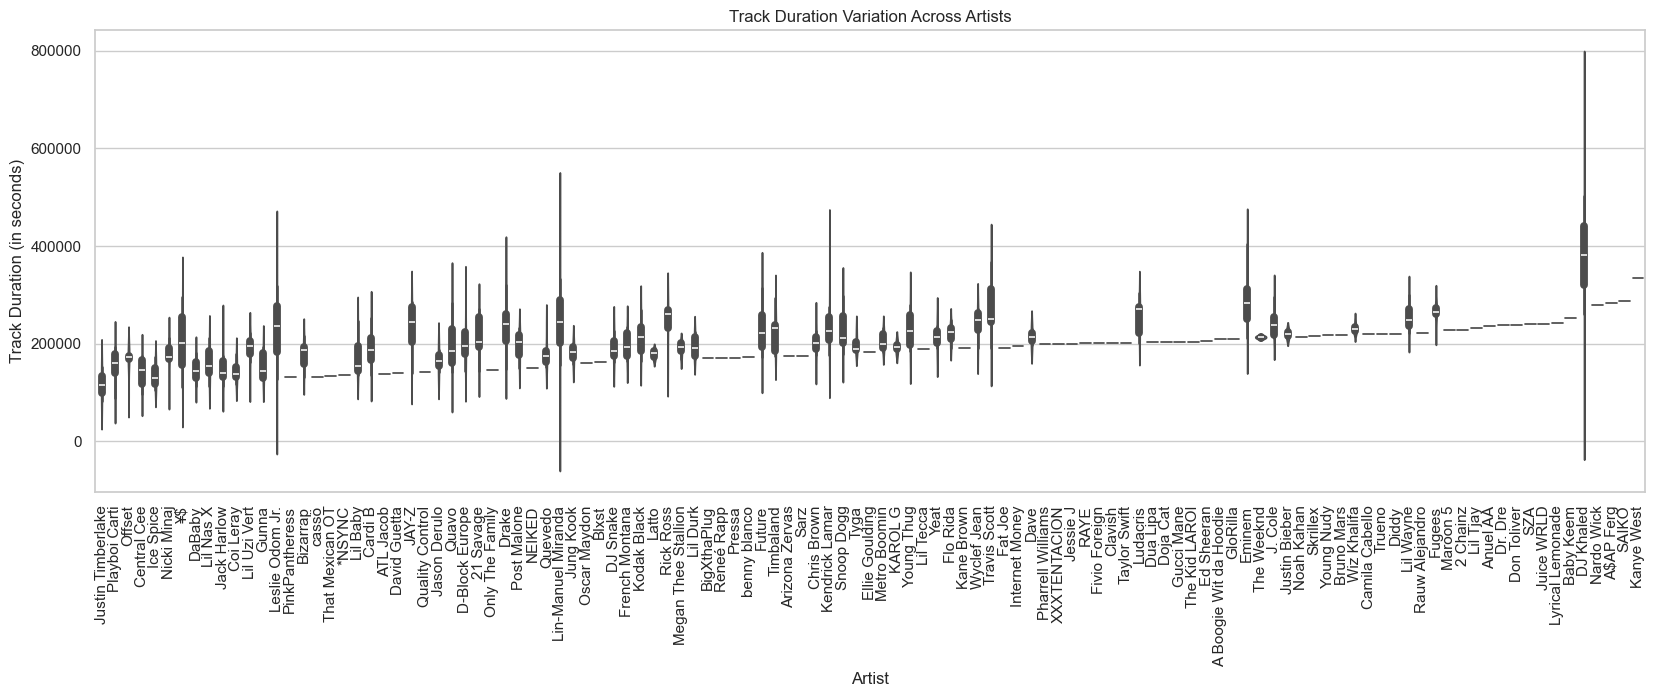

In [88]:
plt.figure(figsize=(20, 6))
sns.violinplot(x='Artist', y='Duration (ms)', data = df.sort_values('Duration (ms)'))
plt.title('Track Duration Variation Across Artists')
plt.xlabel('Artist')
plt.ylabel('Track Duration (in seconds)')
plt.xticks(rotation=90)
plt.show()

#### Q10) How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

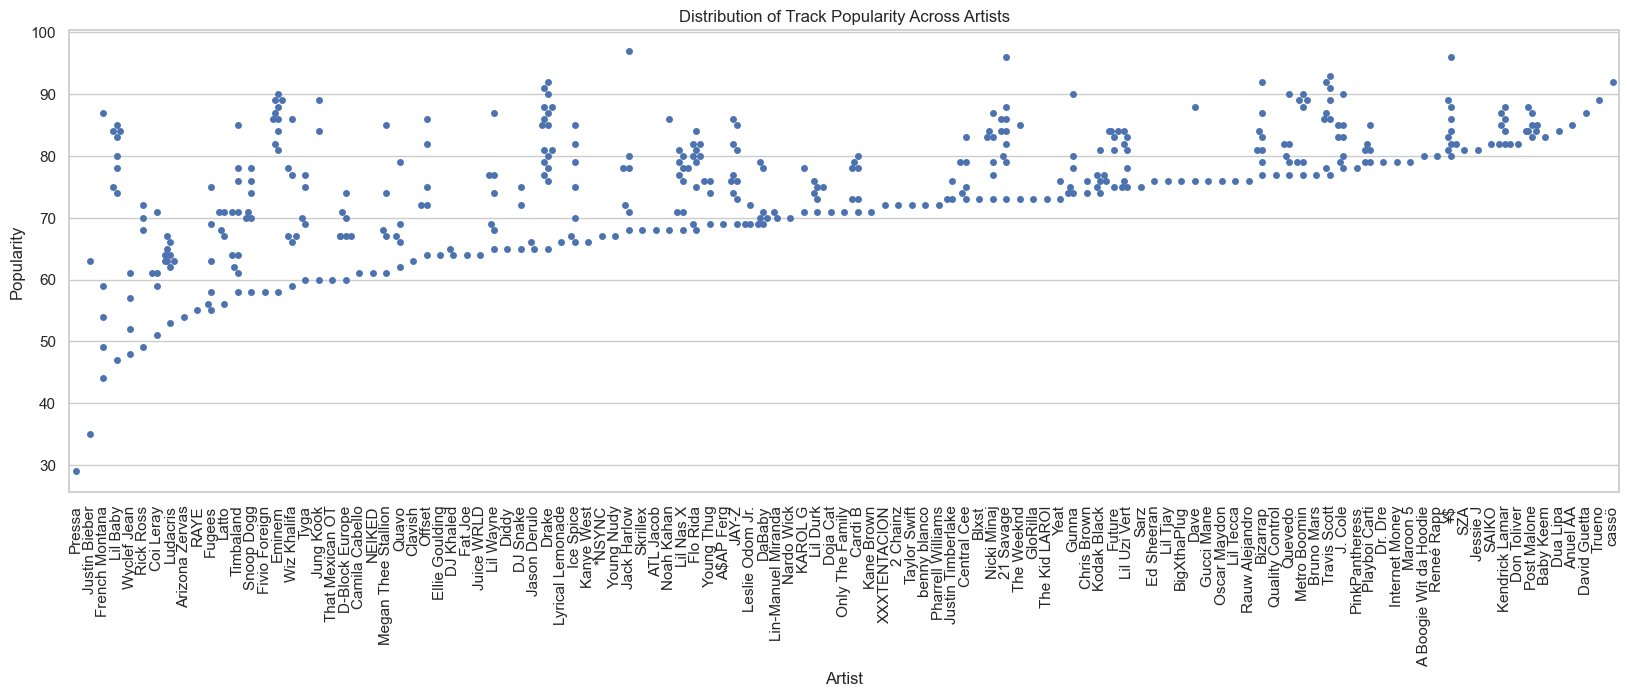

In [89]:
plt.figure(figsize=(20, 6))
sns.swarmplot(x='Artist', y='Popularity', data = df.sort_values('Popularity'))
plt.title('Distribution of Track Popularity Across Artists')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=90)
plt.show()

## ---------------------------------------------------- over --------------------------------------------------